In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#import statsmodels as sm
import scipy.stats as stats
import statsmodels.graphics.tsaplots as tsaplots
import statsmodels.api as sm


# AR simulation

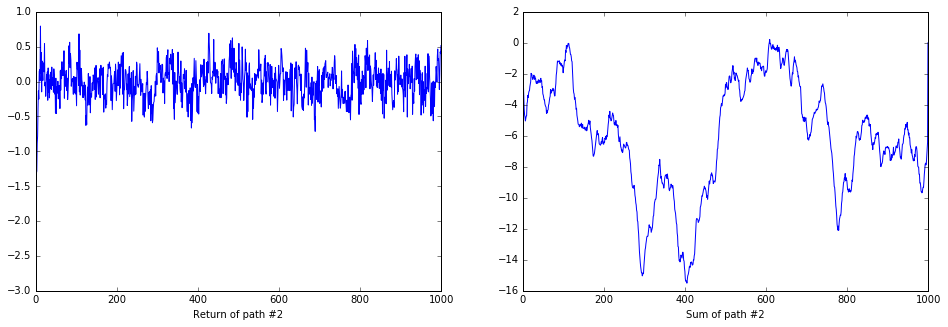

In [118]:
nstep = 1000
paths = 1000
phi0 = 0
phi1 = 0.2
phi2 =  0.4
rt = np.random.randn(nstep, paths)
at = np.random.randn(nstep, paths)*0.2
sumt = np.zeros((nstep, paths))
for i in range(nstep-2):
    rt[i+2] = phi0 + phi1*rt[i+1] +phi2*rt[i] + at[i+2] 
    sumt[i+1] = sumt[i]+rt[i+2] 
#plt.plot(rt[:,1])
fig = plt.figure(figsize=(16,5))
ax1 = fig.add_subplot(121)
plt.plot(rt[:,2])
plt.xlabel('Return of path #2')
ax1 = fig.add_subplot(122)
plt.plot(sumt[:,2])
plt.xlabel('Sum of path #2')
plt.show()

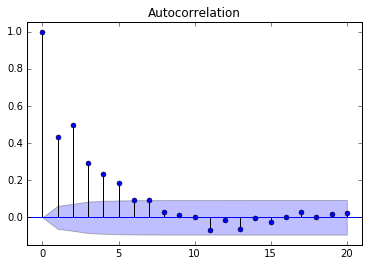

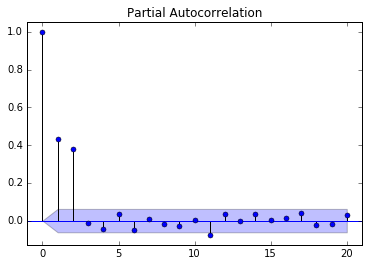

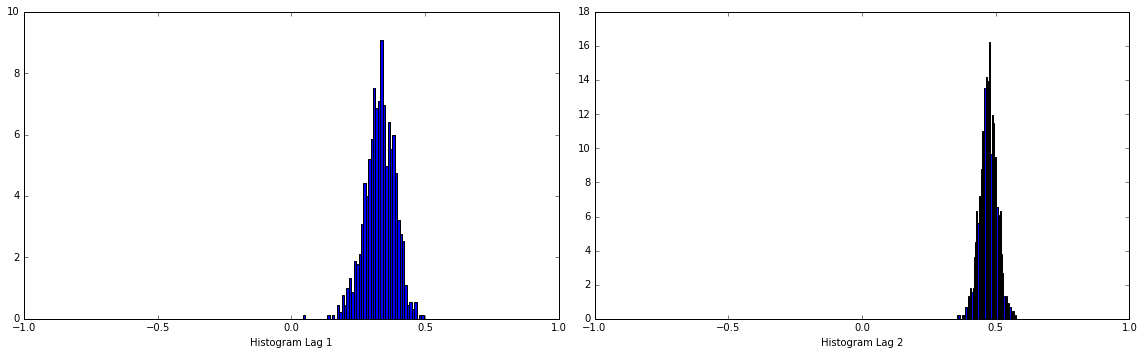

In [119]:
rtp = pd.DataFrame(rt)
atp = pd.DataFrame(at)
tsaplots.plot_acf(rtp[2], lags=20);
tsaplots.plot_pacf(rtp[2], lags = 20)



fig = plt.figure(figsize=(16,5))

#ax0 = fig.add_subplot(311)
#ax = plt.gca()
#ax.set_xlabel('AFC for Path #2')


ax1 = fig.add_subplot(121)
lag1 = [rtp[i].autocorr(lag=1) for i in range(paths)]
hist, bins = np.histogram(lag1,bins=50, density = True)
width = (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, width=width)
ax = plt.gca()
ax.set_xlim([-1,1]), ax.set_xlabel('Histogram Lag 1')



fit = stats.norm.pdf(np.linspace(0,0.4,100), phi1, 1/nstep)
#plt.plot(np.linspace(0,0.4,100), fit)

ax2 = fig.add_subplot(122)
lag2 = [rtp[i].autocorr(lag=2) for i in range(paths)]

hist, bins = np.histogram(lag2,bins=50, density = True)
width =  (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
axes = plt.gca()
axes.set_xlim([-1,1]), axes.set_xlabel('Histogram Lag 2')
plt.bar(center, hist, width=width)

#fit = stats.norm.pdf(np.linspace(0.4,0.8,100), phi2, 1/nstep)
#plt.plot(np.linspace(0.4,0.8,100), fit,'r')
#plt.stem([atp[5].autocorr(lag=i) for i in range(20)])
plt.tight_layout()
plt.show()

# AR Model

In [127]:
#linear regression
AR1 = sm.tsa.ARMA(rt[:,1], (2,0))
fit1 = AR1.fit()
fit1.summary()

#fig = plt.figure(figsize=(16,4))
#plt.plot(fit1.fittedvalues)
#plt.plot(rt[0])

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(3, 0)   Log Likelihood                 190.410
Method:                       css-mle   S.D. of innovations              0.200
Date:                Sat, 03 Sep 2016   AIC                           -370.820
Time:                        17:31:03   BIC                           -346.282
Sample:                             0   HQIC                          -361.494
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.0152      0.016     -0.927      0.354        -0.047     0.017
ar.L1.y        0.1846      0.032      5.761      0.000         0.122     0.247
ar.L2.y        0.4525      0.029     15.348      0.000         0.395     0.510
ar.L3.y       -0.0222      0.032     -0.689      0.491        -0.085     0.041
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3350           +0.0000j            1.3350            0.0000
AR.2           -1.6318           +0.0000j            1.6318            0.5000
AR.3           20.6752           +0.0000j           20.6752            0.0000
-----------------------------------------------------------------------------
"""

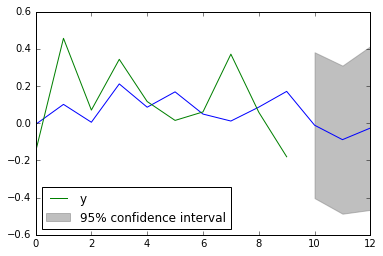

In [124]:
fit1.plot_predict(990,1002,dynamic = False)
plt.show()

## Dane Data

In [3]:
#Real Data
Data = pd.read_csv('Data.csv', dayfirst = False, decimal =',' , index_col=None, parse_dates=[0])
#Data['Date'] = pd.to_datetime(Data['date'])

Data.describe()

,index,dane
count,70.000000,70.000000
mean,0.909854,0.507857
std,1.884844,0.670515
min,-2.915657,-1.000000
25%,-0.413110,0.050000
50%,0.727916,0.410000
75%,1.820389,0.940000
max,7.506650,2.820000


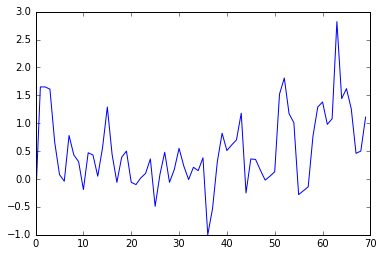

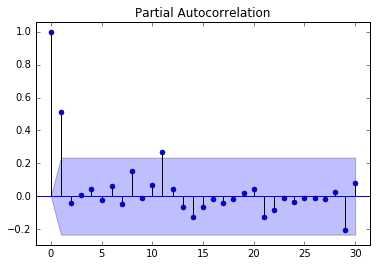

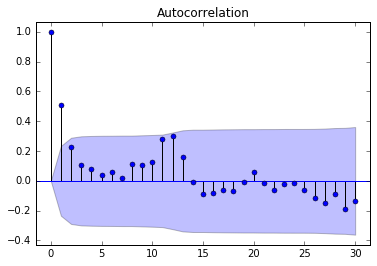

In [30]:
plt.plot(Data['dane'])
tsaplots.plot_pacf(Data['dane'], lags = 30)
tsaplots.plot_acf(Data['dane'], lags=30);

In [27]:
import warnings

with warnings.catch_warnings():
    warnings.filterwarnings("ignore")   
    ARDane = sm.tsa.ARMA(Data['dane'].values, (12,0))
    Dane = ARDane.fit()
Dane.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                   70
Model:                    ARMA(12, 0)   Log Likelihood                 -58.349
Method:                       css-mle   S.D. of innovations              0.500
Date:                Sat, 03 Sep 2016   AIC                            144.698
Time:                        19:03:27   BIC                            176.177
Sample:                             0   HQIC                           157.202
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        138.9163        nan        nan        nan           nan       nan
ar.L1.y        0.5325        nan        nan        nan           nan       nan
ar.L2.y       -0.0758      0.023     -3.288      0.002        -0.121    -0.031
ar.L3.y       -0.0929        nan        nan        nan           nan       nan
ar.L4.y        0.0348        nan        nan        nan           nan       nan
ar.L5.y       -0.0386        nan        nan        nan           nan       nan
ar.L6.y        0.1546   1.39e-06   1.11e+05      0.000         0.155     0.155
ar.L7.y       -0.1128   1.23e-06  -9.17e+04      0.000        -0.113    -0.113
ar.L8.y        0.2317        nan        nan        nan           nan       nan
ar.L9.y       -0.0311        nan        nan        nan           nan       nan
ar.L10.y      -0.1004        nan        nan        nan           nan       nan
ar.L11.y       0.4240        nan        nan        nan           nan       nan
ar.L12.y       0.0739   1.69e-06   4.36e+04      0.000         0.074     0.074
                                    Roots                                     
==============================================================================
                  Real           Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             1.0000           -0.0000j            1.0000           -0.0000
AR.2             0.8881           -0.5599j            1.0498           -0.0895
AR.3             0.8881           +0.5599j            1.0498            0.0895
AR.4             0.5369           -0.9143j            1.0602           -0.1655
AR.5             0.5369           +0.9143j            1.0602            0.1655
AR.6            -0.0321           -1.0832j            1.0837           -0.2547
AR.7            -0.0321           +1.0832j            1.0837            0.2547
AR.8            -0.6557           -0.8502j            1.0737           -0.3546
AR.9            -0.6557           +0.8502j            1.0737            0.3546
AR.10           -1.1370           -0.2569j            1.1657           -0.4646
AR.11           -1.1370           +0.2569j            1.1657            0.4646
AR.12           -5.9376           -0.0000j            5.9376           -0.5000
------------------------------------------------------------------------------
"""

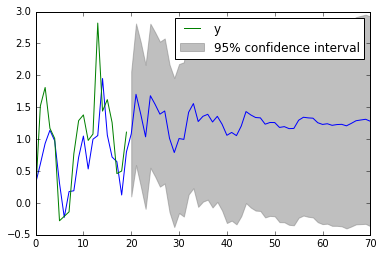

In [8]:
Dane.plot_predict(50,120, dynamic = False)
plt.show()

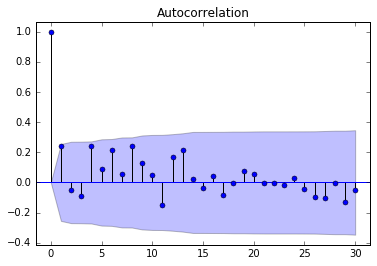

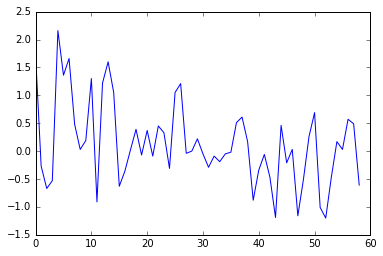

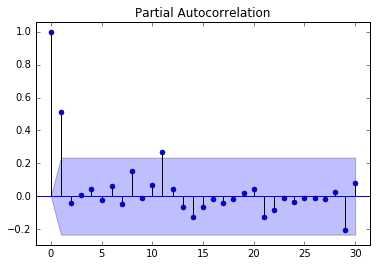

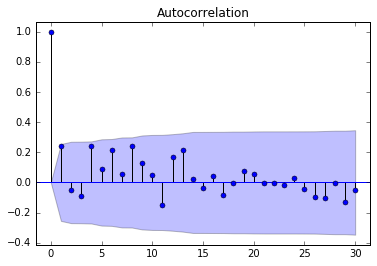

In [49]:
#season adjustment
DaneS =  (np.roll(Data['dane'].values, 11)- Data['dane'].values)[0:70-11]
plt.plot(DaneS)
tsaplots.plot_pacf(Data['dane'], lags = 30)
tsaplots.plot_acf(DaneS, lags=30)

In [55]:
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    ARDaneS = sm.tsa.ARMA(DaneS,(1,0))
    DaneR = ARDaneS.fit()
DaneR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                   59
Model:                     ARMA(1, 0)   Log Likelihood                 -64.705
Method:                       css-mle   S.D. of innovations              0.724
Date:                Sun, 04 Sep 2016   AIC                            135.410
Time:                        09:25:34   BIC                            141.643
Sample:                             0   HQIC                           137.843
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.1429      0.127      1.121      0.267        -0.107     0.393
ar.L1.y        0.2647      0.131      2.024      0.048         0.008     0.521
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            3.7776           +0.0000j            3.7776            0.0000
-----------------------------------------------------------------------------
"""

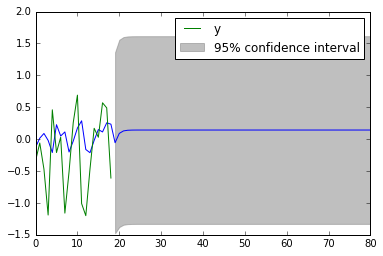

In [57]:
DaneR.plot_predict(40,120, dynamic = False)
plt.show()

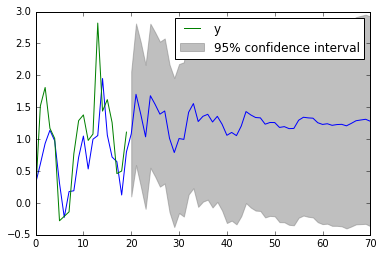

In [45]:
Dane.plot_predict(50,120, dynamic = False)
plt.show()

In [51]:
DaneR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                   59
Model:                    ARMA(11, 0)   Log Likelihood                 -53.604
Method:                       css-mle   S.D. of innovations              0.584
Date:                Sun, 04 Sep 2016   AIC                            133.208
Time:                        09:24:35   BIC                            160.216
Sample:                             0   HQIC                           143.751
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.1711      0.232      0.736      0.465        -0.284     0.627
ar.L1.y        0.3910      0.134      2.912      0.005         0.128     0.654
ar.L2.y       -0.2923      0.146     -1.998      0.052        -0.579    -0.006
ar.L3.y       -0.0280      0.149     -0.188      0.851        -0.320     0.264
ar.L4.y        0.2269      0.134      1.690      0.098        -0.036     0.490
ar.L5.y       -0.1642      0.145     -1.134      0.263        -0.448     0.120
ar.L6.y        0.4261      0.138      3.099      0.003         0.157     0.696
ar.L7.y       -0.1037      0.148     -0.701      0.487        -0.394     0.186
ar.L8.y        0.3911      0.149      2.623      0.012         0.099     0.683
ar.L9.y       -0.0021      0.167     -0.012      0.990        -0.329     0.325
ar.L10.y      -0.0307      0.161     -0.191      0.849        -0.346     0.285
ar.L11.y      -0.0924      0.156     -0.593      0.556        -0.398     0.213
                                    Roots                                     
==============================================================================
                  Real           Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             1.0694           -0.0000j            1.0694           -0.0000
AR.2             0.6794           -0.8141j            1.0603           -0.1393
AR.3             0.6794           +0.8141j            1.0603            0.1393
AR.4             1.5975           -0.0000j            1.5975           -0.0000
AR.5             0.1177           -1.1053j            1.1116           -0.2331
AR.6             0.1177           +1.1053j            1.1116            0.2331
AR.7            -1.0316           -0.0000j            1.0316           -0.5000
AR.8            -0.5968           -1.0654j            1.2212           -0.3313
AR.9            -0.5968           +1.0654j            1.2212            0.3313
AR.10           -1.1841           -1.2494j            1.7214           -0.3707
AR.11           -1.1841           +1.2494j            1.7214            0.3707
------------------------------------------------------------------------------
"""